# 4. 10 Coding Etiquette & Excel Reporting

## Table of Contents

### Question 1 - Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

### Question 2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### Question 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

### Question 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

### Question 5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Question 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Question 6 - Create an appropriate visualization to show the distribution of profiles.

### Question 8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Question 9 - Extra steps per  Project Brief

## Q1)

In [1]:
# Importing  Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\\Users\\figue\\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custmr_merge.pkl'))

In [4]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [5]:
pd.set_option('display.max_columns', 50)

## Q2)

In [6]:
df_1 = df.drop(['first_name', 'last_name'], axis=1)

As shown in the  reading, names are dangerous as they can be  traced  back, however, I do not want to remove the names for internal use.

In [7]:
df.dtypes

order_id                           int64
user_id                            int64
order_number                       int64
orders_day_of_week                 int64
order_hour_of_day                  int64
days_since_prior_order           float64
first_order                         bool
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
price_range_loc                   object
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
average_spend                    float64
spender_flag                      object
customer_frequency               float64
frequency_flag                    object
first_name      

In [8]:
df_1.dtypes

order_id                           int64
user_id                            int64
order_number                       int64
orders_day_of_week                 int64
order_hour_of_day                  int64
days_since_prior_order           float64
first_order                         bool
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
price_range_loc                   object
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
average_spend                    float64
spender_flag                      object
customer_frequency               float64
frequency_flag                    object
gender          

## Q3)

#### Reference for regions: https://www.50states.com/city/regions.htm

In [9]:
df_1.loc[(df_1['state'] == 'California') | 
         (df_1['state'] == 'Arizona') | 
         (df_1['state'] == 'Colorado') | 
         (df_1['state'] == 'Nevada') | 
         (df_1['state'] == 'Utah') | 
         (df_1['state'] == 'New Mexico')|
         (df_1['state'] == 'Montana')|
         (df_1['state'] == 'Idaho')|
         (df_1['state'] == 'Wyoming')|
         (df_1['state'] == 'Alaska')|
         (df_1['state'] == 'Hawaii')|
         (df_1['state'] == 'Washington')|
         (df_1['state'] == 'Oregon'), 
         'region'] = 'West'

In [10]:
df_1.loc[(df_1['state'] == 'Delaware') | 
         (df_1['state'] == 'Florida') | 
         (df_1['state'] == 'District of Columbia') | 
         (df_1['state'] == 'Georgia') | 
         (df_1['state'] == 'Maryland') | 
         (df_1['state'] == 'North Carolina')|
         (df_1['state'] == 'South Carolina')|
         (df_1['state'] == 'Virginia')|
         (df_1['state'] == 'West Virginia')|
         (df_1['state'] == 'Alabama')|
         (df_1['state'] == 'Kentucky')|
         (df_1['state'] == 'Mississippi')|
         (df_1['state'] == 'Tennessee')|
         (df_1['state'] == 'Texas')|
         (df_1['state'] == 'Arkansas')|
         (df_1['state'] == 'Louisiana')|
         (df_1['state'] == 'Oklahoma'), 
         'region'] = 'South'

In [11]:
df_1.loc[(df_1['state'] == 'Minnesota') | 
         (df_1['state'] == 'Iowa') | 
         (df_1['state'] == 'Michigan') | 
         (df_1['state'] == 'Wisconsin') | 
         (df_1['state'] == 'Illinois') | 
         (df_1['state'] == 'Indiana')|
         (df_1['state'] == 'North Dakota')|
         (df_1['state'] == 'South Dakota')|
         (df_1['state'] == 'Nebraska')|
         (df_1['state'] == 'Kansas')|
         (df_1['state'] == 'Missouri')|
         (df_1['state'] == 'Ohio'), 
         'region'] = 'Midwest'

In [12]:
df_1.loc[(df_1['state'] == 'Connecticut') | 
         (df_1['state'] == 'Maine') | 
         (df_1['state'] == 'Massachusetts') | 
         (df_1['state'] == 'New Hampshire') | 
         (df_1['state'] == 'Rhode Island') | 
         (df_1['state'] == 'Vermont')|
         (df_1['state'] == 'New Jersey')|
         (df_1['state'] == 'New York')|
         (df_1['state'] == 'Pennsylvania'), 
         'region'] = 'Northeast'

#### creating a  pivot table to show data on spending by region

In [13]:
df_2 = df_1.pivot_table(index = 'region', columns = 'spender_flag', aggfunc = 'size', fill_value = 0)

In [14]:
df_2

spender_flag,Low_spender,high_spender
region,,
Midwest,7568060,29265
Northeast,5704094,18642
South,10751306,40579
West,8261671,31242


In [15]:
df_1.groupby('region')['prices'].sum()

region
Midwest      59192977.7
Northeast    44530105.8
South        84107910.4
West         64595126.7
Name: prices, dtype: float64

It appears  that  southern comfort food comes  with a hefty price tag. We see that indivduals in the sothern region of the U.S are the highest spenders  in both categories. While individuals in  the Northeast region are more  frugal with their spendings in  both categories. 

## Q4)

In [16]:
df_1['order_flag'] = np.where(df_1['max_order'] < 5, 'Fewer than 5', '5 or more')

In [17]:
df_1.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,dependants,relationship_status,income,_merge,region,order_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more


In [18]:
df_few_5 = df_1[df_1['order_flag'] == 'Fewer than 5']

In [19]:
df_1 = df_1[df_1['order_flag'] == '5 or more']

In [20]:
df_1.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,dependants,relationship_status,income,_merge,region,order_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more


In [21]:
df_1.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,dependants,relationship_status,income,_merge,region,order_flag
32404850,3308056,106143,22,4,20,10.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,nan,Least busy,Slowest days,Average orders,26,Regular customer,10.7,high_spender,7.0,frequent_customer,Male,Hawaii,25,2017-05-26,0,single,53755,both,West,5 or more
32404851,2988973,106143,23,2,22,5.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,nan,Regularly busy,Regularly busy,Average orders,26,Regular customer,10.7,high_spender,7.0,frequent_customer,Male,Hawaii,25,2017-05-26,0,single,53755,both,West,5 or more
32404852,930,106143,24,6,12,4.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,nan,Regularly busy,Regularly busy,Average orders,26,Regular customer,10.7,high_spender,7.0,frequent_customer,Male,Hawaii,25,2017-05-26,0,single,53755,both,West,5 or more
32404853,467253,106143,25,6,16,7.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,nan,Regularly busy,Regularly busy,Average orders,26,Regular customer,10.7,high_spender,7.0,frequent_customer,Male,Hawaii,25,2017-05-26,0,single,53755,both,West,5 or more
32404854,156685,106143,26,4,23,5.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,nan,Least busy,Slowest days,Average orders,26,Regular customer,10.7,high_spender,7.0,frequent_customer,Male,Hawaii,25,2017-05-26,0,single,53755,both,West,5 or more


## Q6)


#### Flag based  on  age column

In [22]:
df_1.loc[df_1['age'] <= 18, 'age_flag'] = 'adolescent (<= 18)'

In [23]:
df_1.loc[(df_1['age'] > 18) & (df_1['age'] < 35), 'age_flag'] = 'young adult (> 18 & < 35)'

In [24]:
df_1.loc[(df_1['age'] >= 35) & (df_1['age'] <= 65), 'age_flag'] = 'adult (>= 35 & <= 65)'

In [25]:
df_1.loc[df_1['age'] > 65, 'age_flag'] = 'senior citizen (> 65)'

#### Bar Chart for age  flag

(array([0, 1, 2, 3]),
 [Text(0, 0, 'adolescent (<= 18)'),
  Text(1, 0, 'adult (>= 35 & <= 65)'),
  Text(2, 0, 'senior citizen (> 65)'),
  Text(3, 0, 'young adult (> 18 & < 35)')])

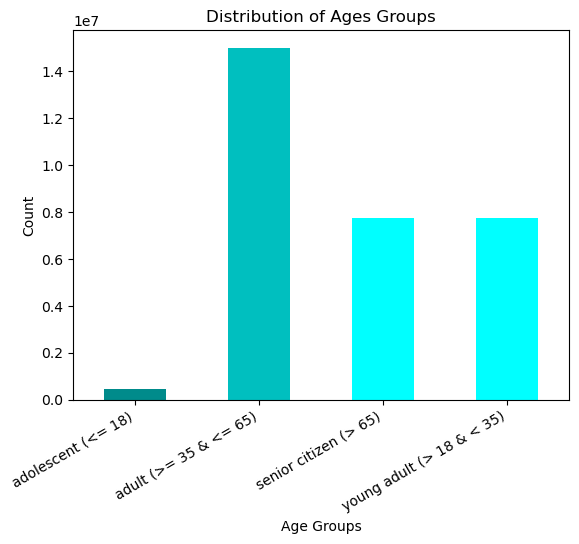

In [26]:
bar = df_1['age_flag'].value_counts().sort_index().plot.bar(color =['darkcyan', 'c', 'aqua', 'cyan'])
plt.title('Distribution of Ages Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation = 30, ha = 'right')

In [27]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dist_of_age.png'))

#### Flag  based on income

In [28]:
df_1.loc[df_1['income'] <= 12000, 'income_flag'] = 'poverty'

In [29]:
df_1.loc[(df_1['income'] > 12000) & (df_1['income'] <= 20000), 'income_flag'] = 'low income'

In [30]:
df_1.loc[(df_1['income'] > 20000) & (df_1['income'] <= 30000), 'income_flag'] = 'lower-middle class'

In [31]:
df_1.loc[(df_1['income'] > 30000) & (df_1['income'] <= 80000), 'income_flag'] = 'middle class'

In [32]:
df_1.loc[df_1['income'] > 80000, 'income_flag'] = 'wealthy'

#### Bar Chart for income

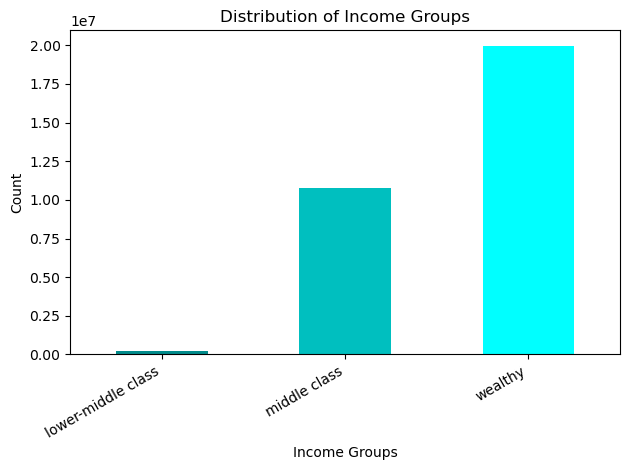

In [33]:
bar_2 = df_1['income_flag'].value_counts().sort_index().plot.bar(color =['darkcyan', 'c', 'aqua', 'cyan', 'darkturquoise'])
plt.title('Distribution of Income Groups')
plt.xlabel('Income Groups')
plt.ylabel('Count')
plt.xticks(rotation = 30, ha = 'right')
plt.tight_layout()

In [34]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dist_of_income.png'))

#### Flag based  on  dependants

In [35]:
df_1.loc[df_1['dependants'] == 0, 'dependants_flag'] = 'no children'

In [36]:
df_1.loc[df_1['dependants'] >= 1, 'dependants_flag'] = "have child(ren)"

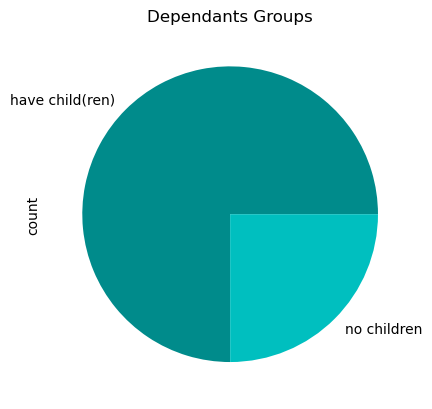

In [37]:
pie = df_1['dependants_flag'].value_counts().plot.pie(title = 'Dependants Groups', colors =['darkcyan', 'c'])


In [38]:
pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dist_of_depndts.png'))

## Q7)

In [39]:
df_1.groupby('income_flag').agg({'customer_frequency': ['mean', 'min', 'max']})

customer_frequency           
                                 mean  min   max
income_flag                                     
lower-middle class          10.955422  0.0  30.0
middle class                10.062081  0.0  30.0
wealthy                      9.890702  0.0  30.0

We see that individuals that are lower-middle class are more likely to use InstantCart's services.

In [40]:
df_1.groupby('income_flag').agg({'average_spend': ['mean', 'min', 'max']})

average_spend                     
                            mean       min        max
income_flag                                          
lower-middle class      6.532439  1.773333   7.000000
middle class            7.509359  1.000000  15.000000
wealthy                 7.954864  4.370588  20.114286

However, we see that wealthy individuals are more liekly to spend more on InstantCart

This means that lower-middle  class use the  services the most, but do  not spend as much. While  wealthy  indivduals  ust the services less but  spend the  most when they  do use  it.

## Q8)

In [41]:
df_dep_t = df_dep.T

In [42]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


#### Removing unnecessary titles and columns

In [43]:
new_header = df_dep_t.iloc[0]

In [44]:
df_dep_t_new = df_dep_t[1:]

In [45]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [46]:
department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

In [47]:
df_1['department'] = df_1['department_id'].map(department_mapping)

In [48]:
df_1.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,dependants,relationship_status,income,_merge,region,order_flag,age_flag,income_flag,dependants_flag,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more,young adult (> 18 & < 35),middle class,have child(ren),beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more,young adult (> 18 & < 35),middle class,have child(ren),beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more,young adult (> 18 & < 35),middle class,have child(ren),beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more,young adult (> 18 & < 35),middle class,have child(ren),beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low_spender,20.5,non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South,5 or more,young adult (> 18 & < 35),middle class,have child(ren),beverages


#### Bar Chart based  on age and department

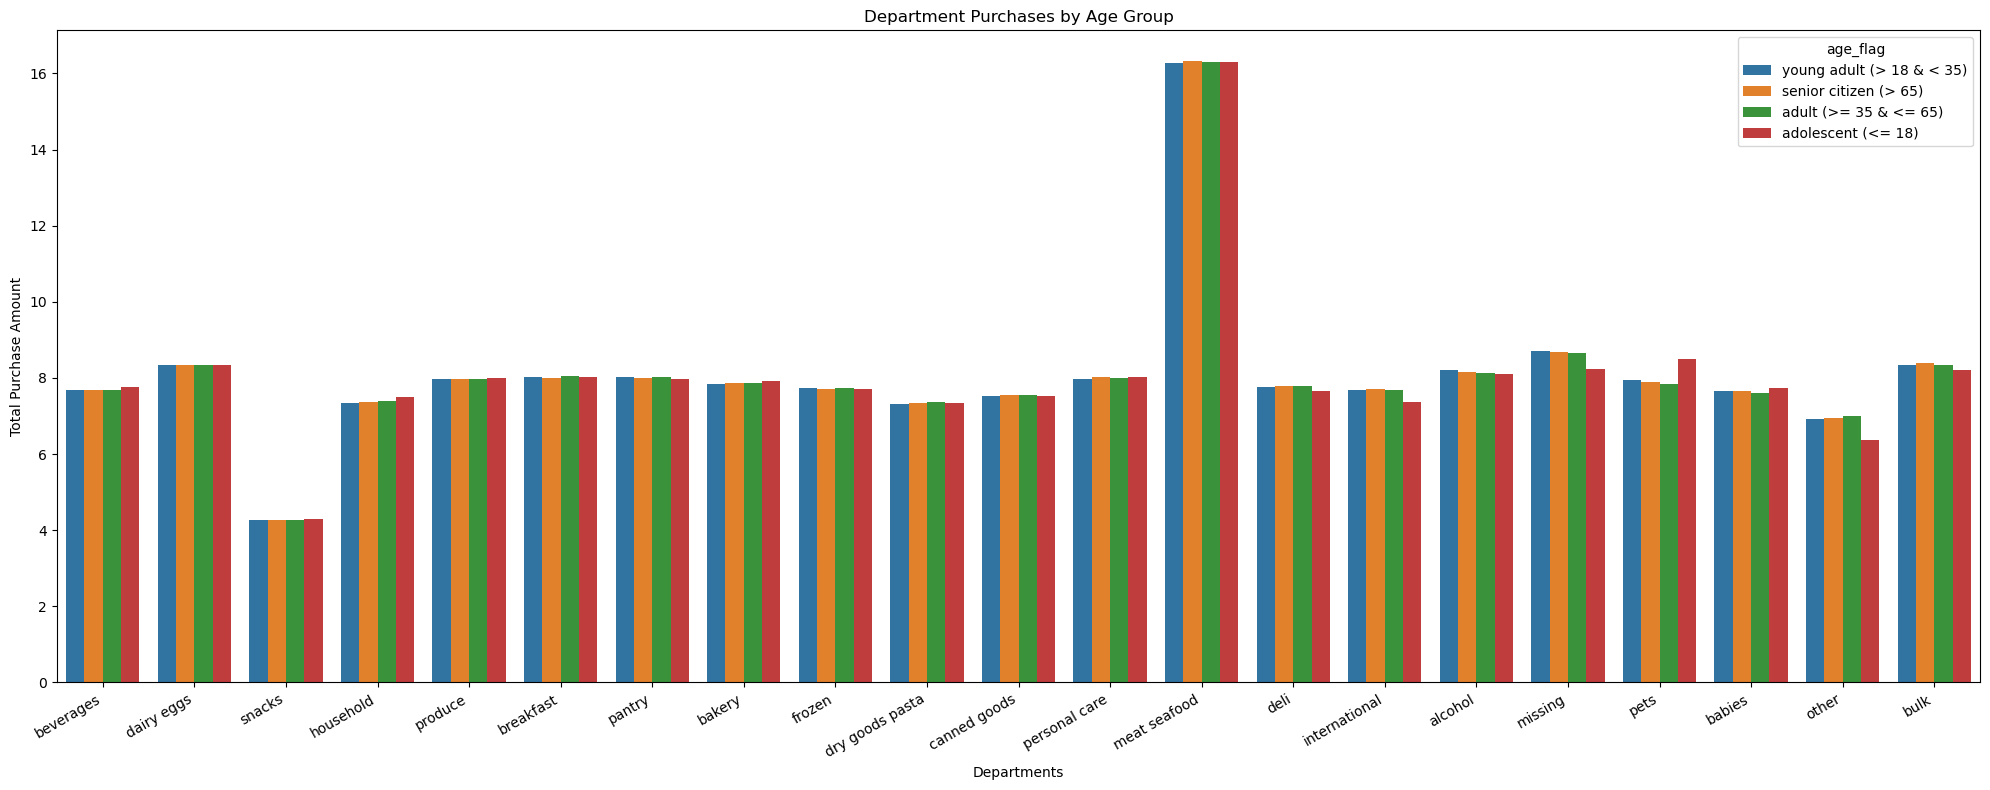

In [49]:
plt.figure(figsize=(20, 8))
bar_4 = sns.barplot(x = 'department', y = 'prices', hue = 'age_flag', data = df_1, errorbar = None)
plt.title('Department Purchases by Age Group')
plt.xlabel('Departments')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation = 30, ha = 'right')
plt.tight_layout()

We can see that age has no influence on the purchases  on departments. That said we can see that meat and  seafood is the department people spend the most on. While the least is snacks, unfortunately not many people want to be tepmted by midnight snacks.

In [50]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_and_age.png'))

#### Age  and region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'West'),
  Text(3, 0, 'Northeast')])

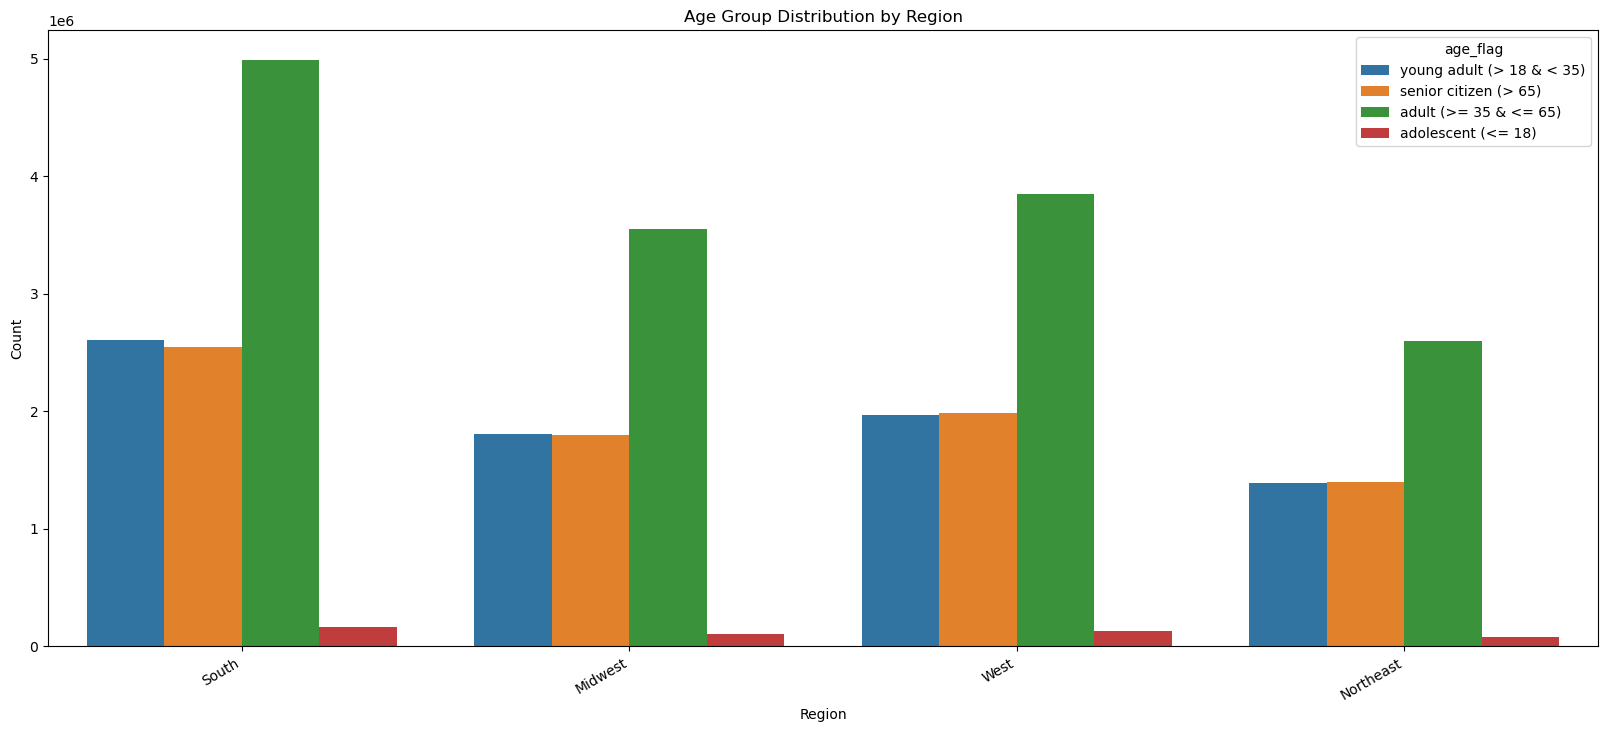

In [51]:
plt.figure(figsize=(20, 8))
bar_5 = sns.countplot(data = df_1, x = 'region', hue = 'age_flag')
plt.title('Age Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation = 30, ha = 'right')

This gives us some answers to the previous data. We can see there is a denser population in the south region, which makes sense for the increased  spending in  that region.

In [52]:
bar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_and_age.png'))

#### Frequency by Region

Text(0, 0.5, 'Count')

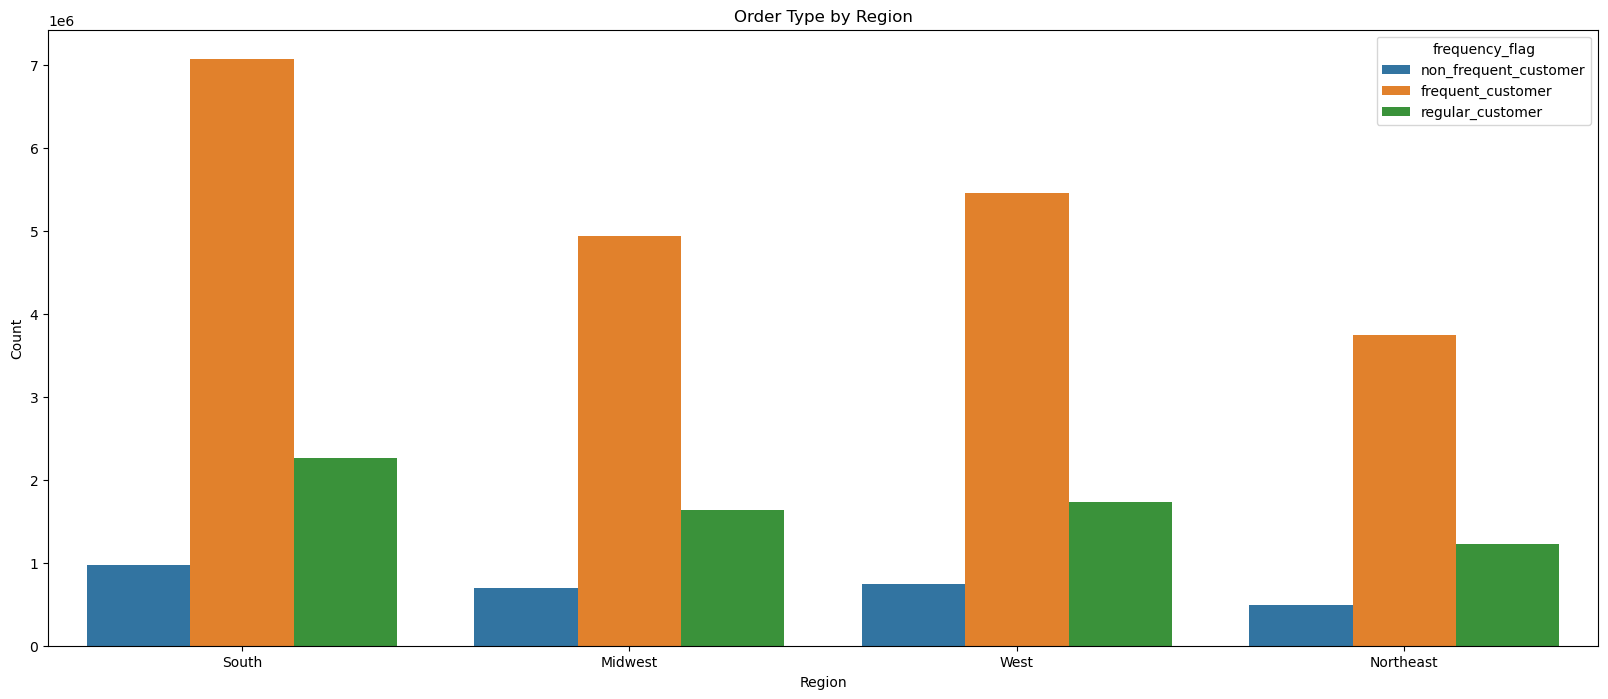

In [53]:
plt.figure(figsize=(20, 8))
bar_6 = sns.countplot(data = df_1, x = 'region', hue = 'frequency_flag')
plt.title('Order Type by Region')
plt.xlabel('Region')
plt.ylabel('Count')

We  can see that the south has the most frequent customers. That comfort food has a reputation for a reason.

In [54]:
bar_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_and_ord_freq.png'))

#### Orders day of week and department

Text(0, 0.5, 'count')

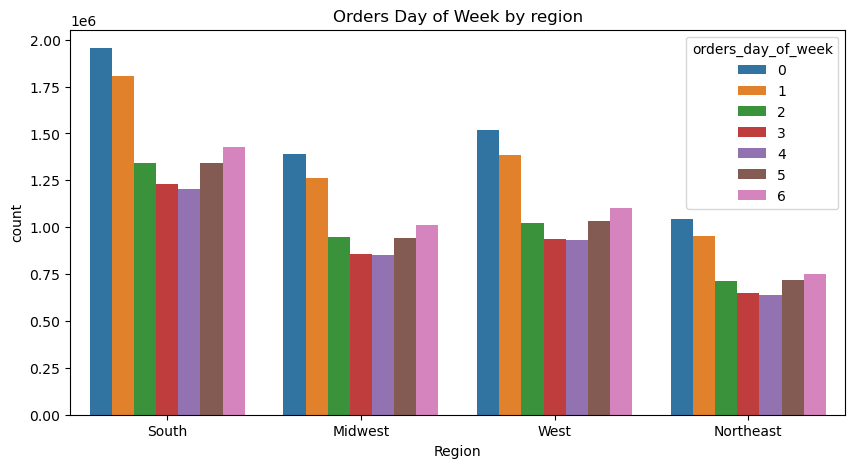

In [55]:
plt.figure(figsize=(10, 5))
bar_7 = sns.countplot(data = df_1, x = 'region', hue = 'orders_day_of_week')
plt.title("Orders Day of Week by region")
plt.xlabel("Region")
plt.ylabel("count")

We can see that Sunday is the busiest day for Instant cart accross all regions. While Wednesday and Thursday are the least  busiest. Sounds like  I need to change my  shopping schedule. 

In [56]:
bar_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_and_ord_dow.png'))

#### Orders and Loyal status

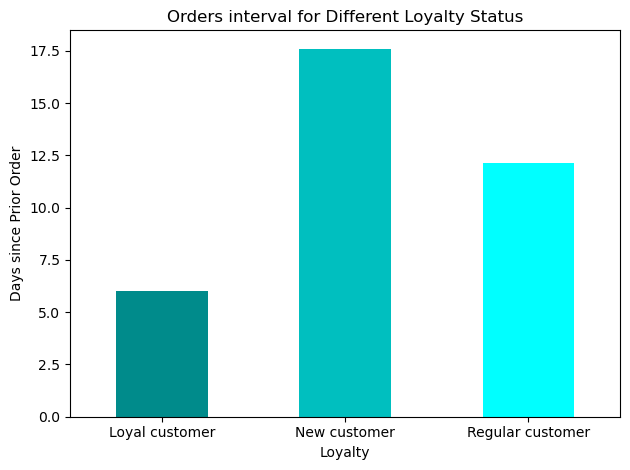

In [57]:
bar_8 = df_1.groupby('loyalty_flag')['days_since_prior_order'].mean().plot.bar(title = 'Orders interval for Different Loyalty Status', xlabel = 'Loyalty', ylabel = 'Days since Prior Order', color = ['darkcyan', 'c', 'aqua'])
plt.xticks(rotation=0)
plt.tight_layout()

In [58]:
bar_8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loy_prior_ord.png'))

#### Loyalty and Prices

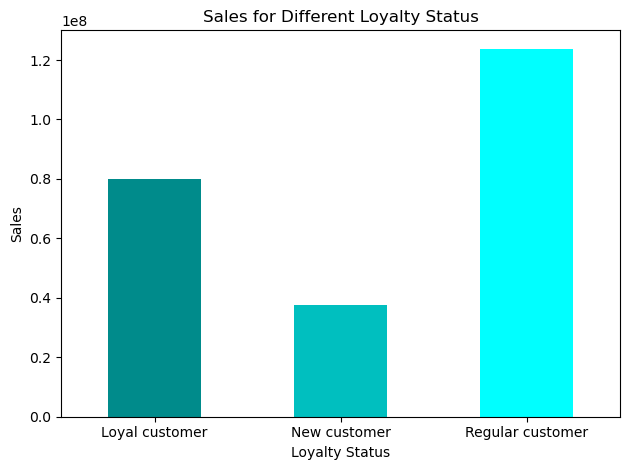

In [59]:
bar_9 = df_1.groupby('loyalty_flag')['prices'].sum().plot.bar(title = 'Sales for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Sales', color = ['darkcyan', 'c', 'aqua'])
plt.xticks(rotation=0)
plt.tight_layout()

In [60]:
bar_9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loy_sales.png'))

#### Relationship status and sales

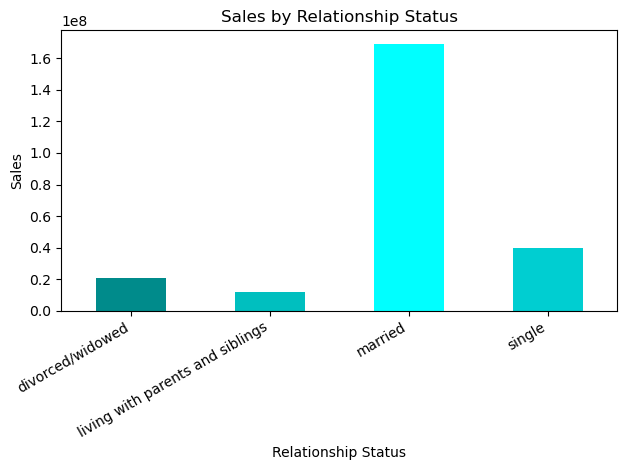

In [61]:
bar_10 = df_1.groupby('relationship_status')['prices'].sum().plot.bar(title = 'Sales by Relationship Status', xlabel = 'Relationship Status', ylabel = 'Sales', color = ['darkcyan', 'c', 'aqua', 'darkturquoise'])
plt.xticks(rotation = 30, ha = 'right')
plt.tight_layout()

In [62]:
bar_10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'rel_stat_sale.png'))

#### Income and Sales

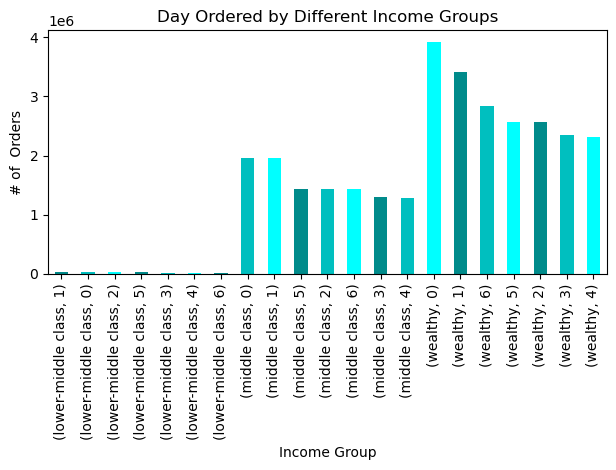

In [63]:
bar_11 = df_1.groupby('income_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Day Ordered by Different Income Groups', xlabel = 'Income Group', ylabel = '# of  Orders', color = ['darkcyan', 'c', 'aqua'])
plt.tight_layout()


In [64]:
bar_11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_ord.png'))

#### Dependants and sales

C:\Users\figue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\figue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


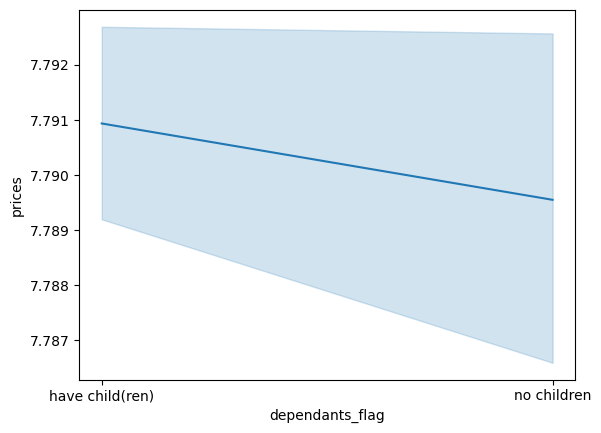

In [65]:
line = sns.lineplot(data = df_1, x = 'dependants_flag',y = 'prices')

In [66]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_sale.png'))

#### Dependants  and Department

In [67]:
df_grouped_dep_depnd = df_1.groupby(['department', 'dependants_flag']).size().unstack()

In [68]:
df_grouped_dep_depnd_sort = df_grouped_dep_depnd.sort_values(by = 'have child(ren)', ascending = False)

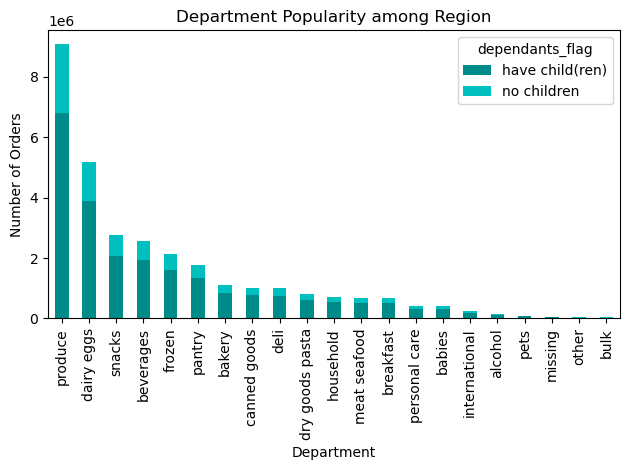

In [69]:
colors = ['darkcyan', 'c']
bar_dep_region = df_grouped_dep_depnd_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [70]:
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_depndt.png'))

## Q9

#### Price  range grouping

#### Price Range Change

In [71]:
df_1.loc[df_1['prices'] > 15, 'price_label'] = 'High-range product'

In [72]:
df_1.loc[(df_1['prices'] <= 15) & (df_1['prices'] > 5), 'price_label'] = 'Mid-range product'

In [73]:
df_1.loc[df_1['prices'] <= 5, 'price_label'] = 'Low-range product'

In [76]:
df_1['price_label'].value_counts(dropna = False)

price_label
Mid-range product     20891771
Low-range product      9674840
High-range product      393076
nan                       4877
Name: count, dtype: int64

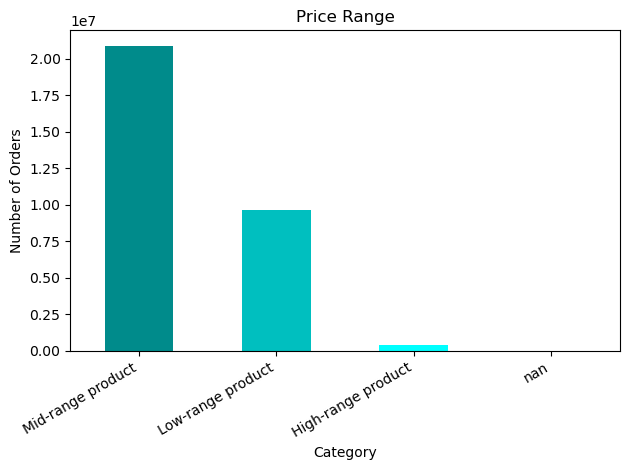

In [81]:
bar_12 = df_1['price_label'].value_counts(dropna = False).plot.bar(title = 'Price Range', xlabel = 'Category', ylabel = 'Number of Orders', color = ['darkcyan', 'c', 'aqua'])
plt.xticks(rotation = 30, ha = 'right')
plt.tight_layout()

In [82]:
bar_12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range.png'))

#### Department Sales

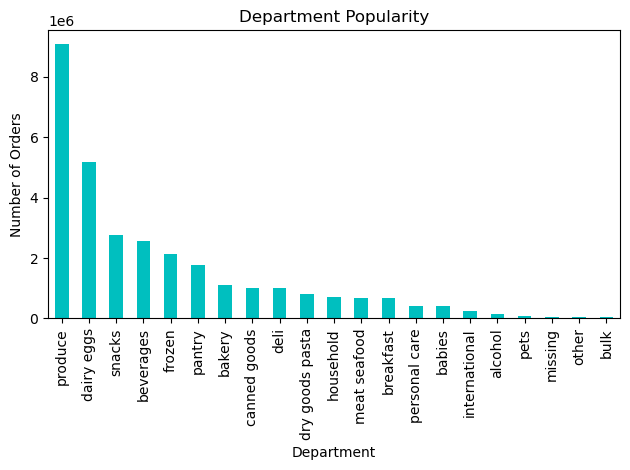

In [78]:
bar_13 = df_1['department'].value_counts(dropna = False).plot.bar(title = 'Department Popularity', xlabel = 'Department', ylabel = 'Number of Orders', color = 'c')
plt.tight_layout()

In [79]:
bar_13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_pop.png'))

# Tidying up

In [80]:
# If I want to use this file again, so I do not need to remove the names again, I am going  to export it. 
df_1.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_custmr_merge_no_names.pkl'))